In [39]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [40]:
df=pd.read_csv('potato.csv')
df.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-1997,AGARTALA,Potato,4.5
1,26-11-1997,AGARTALA,Potato,4.5
2,27-11-1997,AGARTALA,Potato,4.5
3,28-11-1997,AGARTALA,Potato,4.5
4,01-12-1997,AGARTALA,Potato,4.5


In [41]:
df=df[df['Centre_Name']=='BENGALURU']

In [42]:
df['Date']=pd.to_datetime(df['Date'])
df['date_numeric'] = df['Date'].apply(lambda x: x.timestamp())
X=df[['date_numeric']]
y=df['Price']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8220\158227027.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
X_train.shape

(2529, 1)

In [45]:
X_test.shape

(1085, 1)

In [46]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [47]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 9.  8.  5. 10.  7. 19. 15. 13.  5.  5.]
Actual labels   :  15018     6.0
14889     6.0
14155     4.0
15394     8.0
14529     7.0
17215    17.0
16487     9.0
15910    15.0
14233     4.0
14257     6.0
Name: Price, dtype: float64


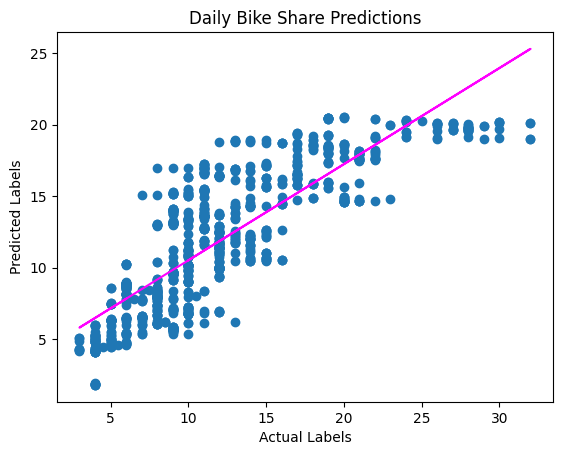

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 10.657133478483612
RMSE: 3.2645265320538615
R2: 0.6912877099678678


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print(model,'\n')

tree=export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 1335441600.00
|   |--- feature_0 <= 1099569600.00
|   |   |--- feature_0 <= 984830400.00
|   |   |   |--- feature_0 <= 957355200.00
|   |   |   |   |--- feature_0 <= 950788800.00
|   |   |   |   |   |--- feature_0 <= 915192000.00
|   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |--- feature_0 >  915192000.00
|   |   |   |   |   |   |--- feature_0 <= 946900800.00
|   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |--- feature_0 >  946900800.00
|   |   |   |   |   |   |   |--- feature_0 <= 949104000.00
|   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |   |--- feature_0 >  949104000.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 949406400.00
|   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  949406400.00
|   |   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |--- feature_0 >  950788800.00
|   |   |   |   |   |--

MSE: 0.8373271889400922
RMSE: 0.9150558392470332
R2: 0.9757445851151482


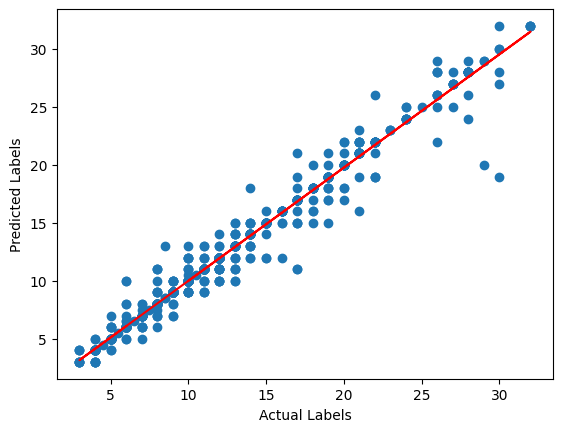

In [51]:
predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2:",r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')
plt.show()

In [58]:
model.predict([[pd.to_datetime("22-03-2025").timestamp()]])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8220\4121663404.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  model.predict([[pd.to_datetime("22-03-2025").timestamp()]])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.])